### Credit Card Fraud Transaction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, auc
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv("C:/Sudhakar/Dataset/Credit card fraud transaction/fraudTrain.csv")

In [3]:
data.shape

(1296675, 23)

In [4]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


# EDA

In [6]:
data = data.drop('Unnamed: 0', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [7]:
data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

this is balanced data for credit card fraud deduction. Because every 1000 transaction may be 1 or 2 transactions are only fraudulent transaction so this is balanced dataset. we need not do to balancing the data(oversampling or under sampling).

# Finding the null percentage in dataset


In [8]:
perc = data.isnull().mean()*100
perc

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

Normally these kind of prediction we are not consider the unique data in the dataset because they are useless to predict the fraudulent transaction the dataset.


In [9]:
pd.DataFrame({'column_names' : perc.index, 
              'null_percentage' :perc.values})

,column_names,null_percentage
0,trans_date_trans_time,0.0
1,cc_num,0.0
2,merchant,0.0
3,category,0.0
4,amt,0.0
5,first,0.0
6,last,0.0
7,gender,0.0
8,street,0.0
9,city,0.0


If the column contains more null values, we can remove or not consider the column help full to create the better solution and prediction.

# Finding Spar
Sparsity: the data having zero value called as sparsity.
Example: the Age and salary column contain zero, that is sparsity  

In [10]:
column_with_zero = []
for i in data.columns:
    perc_zero = (data[i]==0).mean()*100
    column_with_zero.append((i, perc_zero))

In [11]:
column_with_zero

[('trans_date_trans_time', np.float64(0.0)),
 ('cc_num', np.float64(0.0)),
 ('merchant', np.float64(0.0)),
 ('category', np.float64(0.0)),
 ('amt', np.float64(0.0)),
 ('first', np.float64(0.0)),
 ('last', np.float64(0.0)),
 ('gender', np.float64(0.0)),
 ('street', np.float64(0.0)),
 ('city', np.float64(0.0)),
 ('state', np.float64(0.0)),
 ('zip', np.float64(0.0)),
 ('lat', np.float64(0.0)),
 ('long', np.float64(0.0)),
 ('city_pop', np.float64(0.0)),
 ('job', np.float64(0.0)),
 ('dob', np.float64(0.0)),
 ('trans_num', np.float64(0.0)),
 ('unix_time', np.float64(0.0)),
 ('merch_lat', np.float64(0.0)),
 ('merch_long', np.float64(0.0)),
 ('is_fraud', np.float64(99.42113482561166))]

In [12]:
pd.DataFrame(column_with_zero, columns= ['column_name', 'percentage_zero'])

,column_name,percentage_zero
0,trans_date_trans_time,0.000000
1,cc_num,0.000000
2,merchant,0.000000
3,category,0.000000
4,amt,0.000000
5,first,0.000000
6,last,0.000000
7,gender,0.000000
8,street,0.000000
9,city,0.000000


# Identifying the Duplicate
1. If duplicated are there in the dataset, need to drop from the dataset


In [13]:
data.duplicated().sum()
# data.drop_duplicates(inplace=True)

np.int64(0)

# Plotting

In [14]:
data.head(1)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0


In [15]:
data_1 = data.head(1000)            # All the transactions
#data_1 = data[data['is_fraud']==1].head(1000)       # Fraud transactions
fig = px.scatter_mapbox(data_1, lat="lat", lon="long", color="is_fraud", size="amt", zoom=3, height=600)
fig.update_layout(mapbox_style="open-street-map")

#fig = px.scatter_mapbox(data_1, lat="lat", lon="long")
#fig.update_layout(mapbox_style="carto-positron")

C:\Users\vsudh\AppData\Local\Temp\ipykernel_13420\2485723405.py:3: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(data_1, lat="lat", lon="long", color="is_fraud", size="amt", zoom=3, height=600)


In [16]:
def column_category(column_name):
    data_1 = data[column_name].value_counts()
    print(data_1)
    color = sns.color_palette('viridis', len(data_1))
    plt.figure(figsize=(10, 6))
    data_1.plot(kind='bar', color=color)
    plt.show()

In [17]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

city
Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Norfolk           7
Karns City        7
Streator          7
Claypool          7
Bruce             7
Name: count, Length: 894, dtype: int64


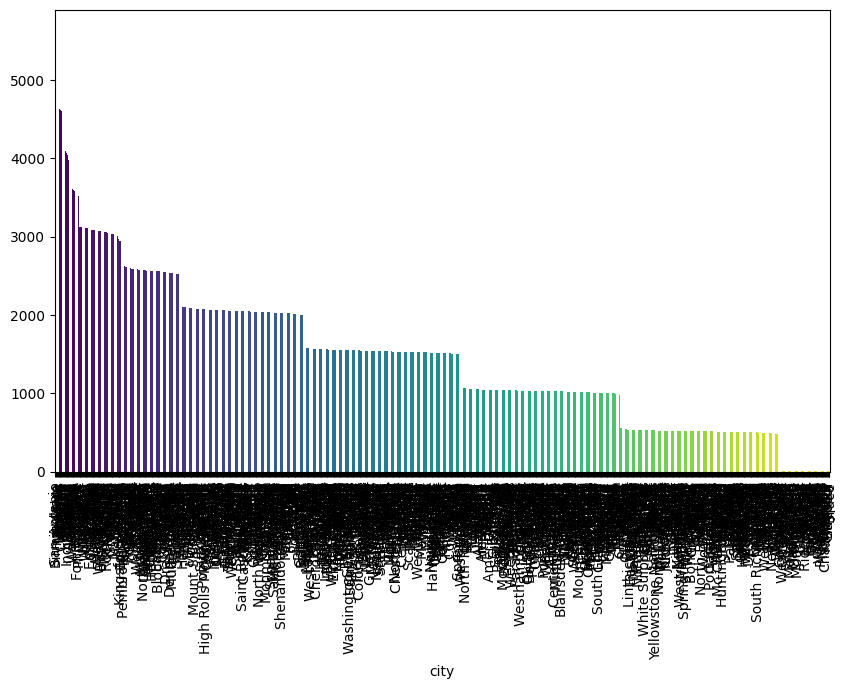

In [18]:
column_category("city")

In [19]:
def Fraud_transaction(column_name):
    data_1 = data[data['is_fraud']==1][column_name].value_counts()
    print(data_1)
    color = sns.color_palette('viridis', len(data_1))
    plt.figure(figsize=(10, 6))
    data_1.plot(kind='bar', color=color)
    plt.show()

city
Houston           39
Warren            33
Huntsville        29
Naples            29
Tulsa             27
                  ..
Bethel             3
Phenix City        2
Phoenix            2
Kilgore            2
Denham Springs     2
Name: count, Length: 702, dtype: int64


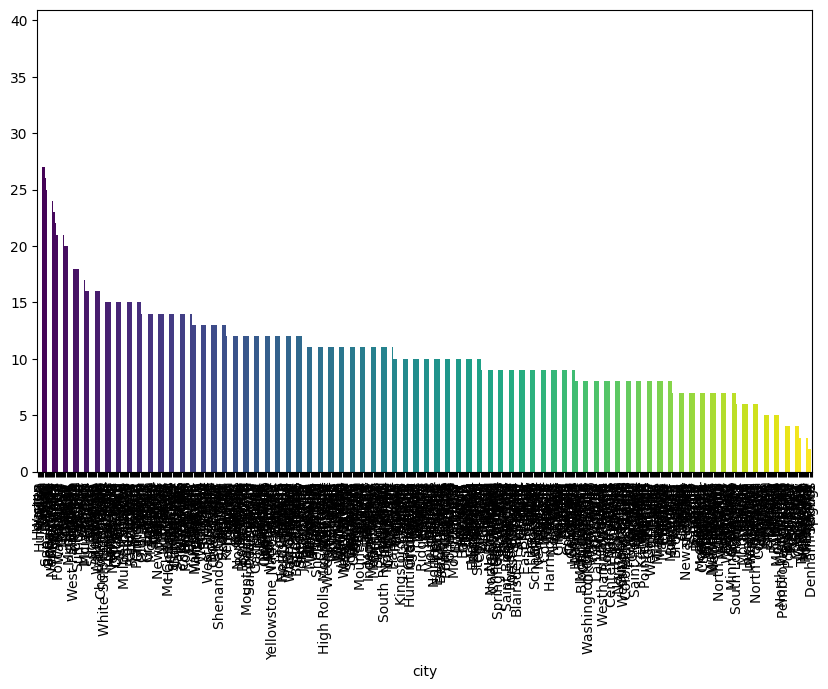

In [20]:
Fraud_transaction("city")


In [21]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [22]:
# Remove the unwanted columns
drop_col = ['trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street','dob', 'trans_num','unix_time']
data_2 = data.drop(drop_col, axis=1)
data_2.shape
data_2.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0
1,grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0
2,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0
3,gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0
4,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0


In [23]:
def gen(x):
    if x == "M":
        return 200
    else:
        return 100

In [24]:
lab_enc = LabelEncoder()
for i in data_2.select_dtypes(include='object').columns:
    data_2[i] = lab_enc.fit_transform(data_2[i])

In [25]:
data_2

,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,36.011293,-82.048315,0
1,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,49.159047,-118.186462,0
2,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,307,43.150704,-112.154481,0
3,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,328,47.034331,-112.561071,0
4,9,41.96,1,216,45,24433,38.4207,-79.4629,99,116,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,1,330,44,84735,37.7175,-112.4777,258,215,36.841266,-111.690765,0
1296671,1,51.70,1,813,20,21790,39.2667,-77.5101,100,360,38.906881,-78.246528,0
1296672,1,105.93,1,346,32,88325,32.9396,-105.8189,899,308,33.619513,-105.130529,0
1296673,1,74.90,1,471,41,57756,43.3526,-102.5411,1126,485,42.788940,-103.241160,0


In [26]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1296675 non-null  int64  
 1   amt         1296675 non-null  float64
 2   gender      1296675 non-null  int64  
 3   city        1296675 non-null  int64  
 4   state       1296675 non-null  int64  
 5   zip         1296675 non-null  int64  
 6   lat         1296675 non-null  float64
 7   long        1296675 non-null  float64
 8   city_pop    1296675 non-null  int64  
 9   job         1296675 non-null  int64  
 10  merch_lat   1296675 non-null  float64
 11  merch_long  1296675 non-null  float64
 12  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 128.6 MB


# start analysis
1. initially find the correlation between the values 

In [27]:
data_corr = data_2.corr()
data_corr

,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
category,1.000000,0.030867,-0.028259,0.000784,0.000211,0.002371,-0.008660,-0.000767,0.009386,0.003490,-0.008519,-0.000736,0.020205
amt,0.030867,1.000000,0.001034,-0.000565,0.001718,0.001843,-0.001926,-0.000187,0.005818,-0.000628,-0.001873,-0.000151,0.219404
gender,-0.028259,0.001034,1.000000,0.016039,-0.031794,-0.065951,0.042935,0.050404,-0.028649,-0.079908,0.042645,0.050350,0.007642
city,0.000784,-0.000565,0.016039,1.000000,-0.043064,0.074757,-0.032044,-0.066703,0.034923,0.020446,-0.031828,-0.066718,-0.002092
state,0.000211,0.001718,-0.031794,-0.043064,1.000000,-0.116264,0.213270,0.132465,-0.012197,0.042915,0.211844,0.132346,0.001730
zip,0.002371,0.001843,-0.065951,0.074757,-0.116264,1.000000,-0.114290,-0.909732,0.078467,-0.005678,-0.113561,-0.908924,-0.002162
lat,-0.008660,-0.001926,0.042935,-0.032044,0.213270,-0.114290,1.000000,-0.015533,-0.155730,-0.027593,0.993592,-0.015509,0.001894
long,-0.000767,-0.000187,0.050404,-0.066703,0.132465,-0.909732,-0.015533,1.000000,-0.052715,-0.002729,-0.015452,0.999120,0.001721
city_pop,0.009386,0.005818,-0.028649,0.034923,-0.012197,0.078467,-0.155730,-0.052715,1.000000,-0.054945,-0.154781,-0.052687,0.002136
job,0.003490,-0.000628,-0.079908,0.020446,0.042915,-0.005678,-0.027593,-0.002729,-0.054945,1.000000,-0.027412,-0.002727,-0.000093


<Axes: >

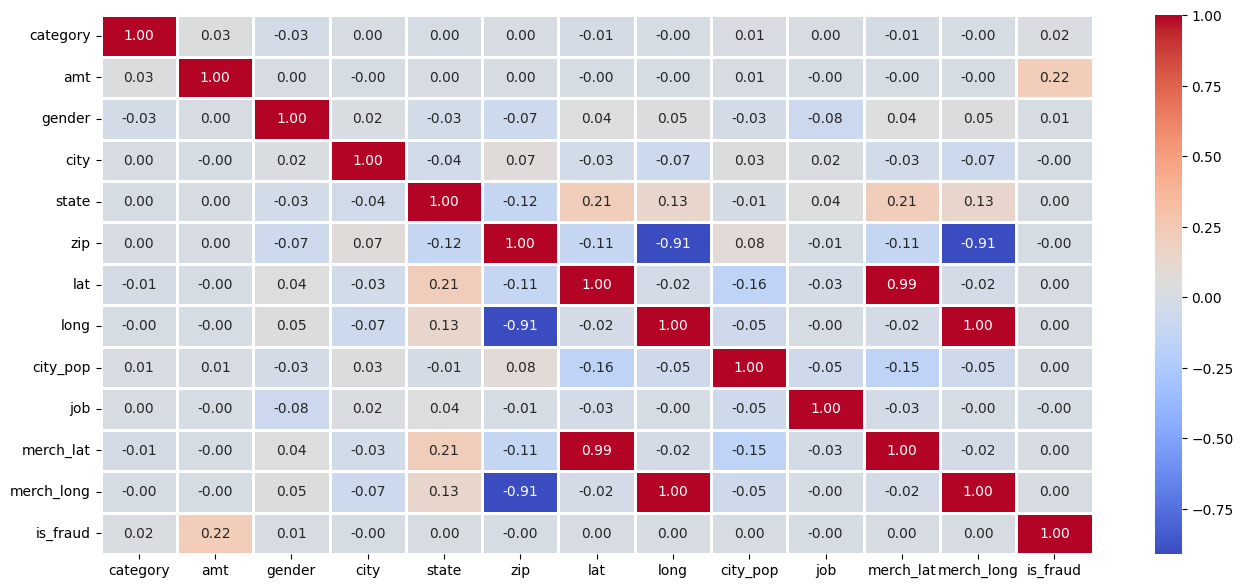

In [28]:
plt.figure(figsize=(16, 7))
sns.heatmap(data_corr, annot=True, cmap='coolwarm',fmt='.2f', linewidths=2)

In [29]:
# From the above heatmap, we can know the correlation between the columns (long and merchant_long) and (lat and merch lat) 
# are highly correlated, so we can remove any of the columns.
data_3 = data_2.drop(['merch_lat', 'merch_long'], axis=1)
data_3

,category,amt,gender,city,state,zip,lat,long,city_pop,job,is_fraud
0,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,0
1,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,0
2,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,307,0
3,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,328,0
4,9,41.96,1,216,45,24433,38.4207,-79.4629,99,116,0
...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,1,330,44,84735,37.7175,-112.4777,258,215,0
1296671,1,51.70,1,813,20,21790,39.2667,-77.5101,100,360,0
1296672,1,105.93,1,346,32,88325,32.9396,-105.8189,899,308,0
1296673,1,74.90,1,471,41,57756,43.3526,-102.5411,1126,485,0


# Hypothesis testing

In [30]:
data_3.columns

Index(['category', 'amt', 'gender', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'is_fraud'],
      dtype='object')

1. p_value threshold is 0.05
2. If p_value is less than 0.05, we can continue the process
3. If p_value grater than 0.05, the correlation is between the 2 feature is high, so ce can drop any one of the feature

In [31]:
_, p_value = stats.ttest_ind(data_3['category'], data_3['gender'])
p_value

np.float64(0.0)

# outliers

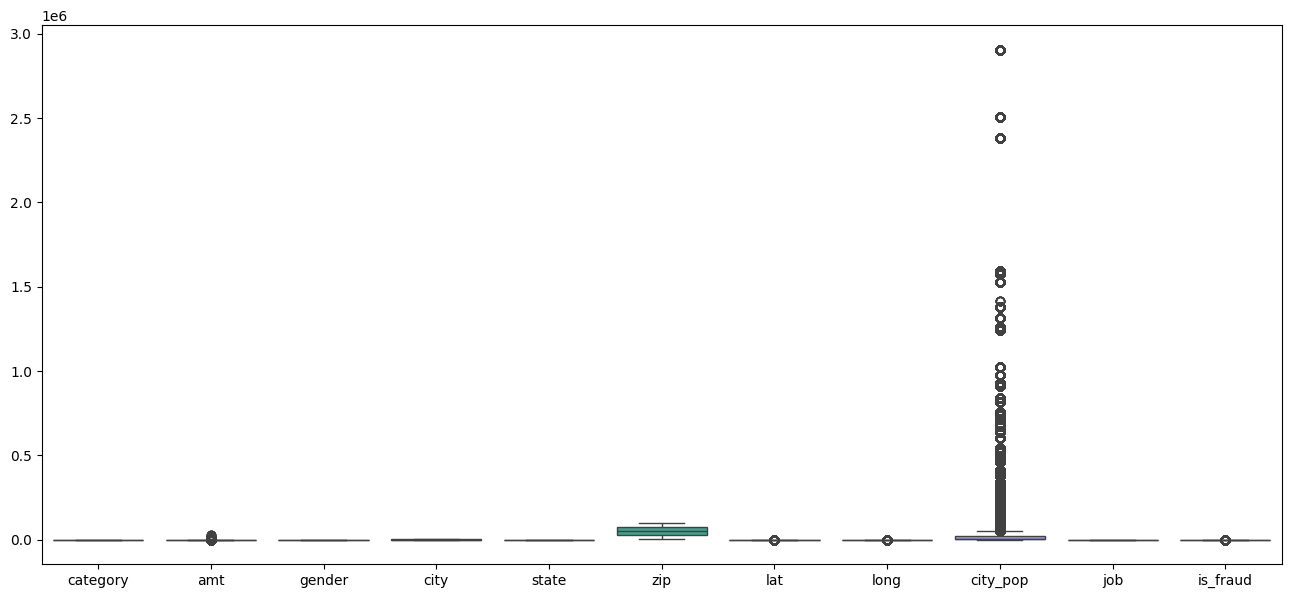

In [32]:
plt.figure(figsize=(16, 7))
sns.boxplot(data=data_3)
plt.show()

There is huge outliers in city_pop feature, so we need to handle it

# Handling the outliers
1. sqrt transformation
2. inverse transformation
3. box-cox transformation
4. Z - score
5. log transformation

Now we are using inverse transformation => if value is 1000 it converts to 1/1000 = 0.001

In [33]:
def inv_trans(x):
    return 1/x
data_4 = data_3.copy()
data_4['city_pop'] = data_3['city_pop'].apply(inv_trans)
data_4

,category,amt,gender,city,state,zip,lat,long,city_pop,job,is_fraud
0,8,4.97,0,526,27,28654,36.0788,-81.1781,0.000286,370,0
1,4,107.23,0,612,47,99160,48.8878,-118.2105,0.006711,428,0
2,0,220.11,1,468,13,83252,42.1808,-112.2620,0.000241,307,0
3,2,45.00,1,84,26,59632,46.2306,-112.1138,0.000516,328,0
4,9,41.96,1,216,45,24433,38.4207,-79.4629,0.010101,116,0
...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,1,330,44,84735,37.7175,-112.4777,0.003876,215,0
1296671,1,51.70,1,813,20,21790,39.2667,-77.5101,0.010000,360,0
1296672,1,105.93,1,346,32,88325,32.9396,-105.8189,0.001112,308,0
1296673,1,74.90,1,471,41,57756,43.3526,-102.5411,0.000888,485,0


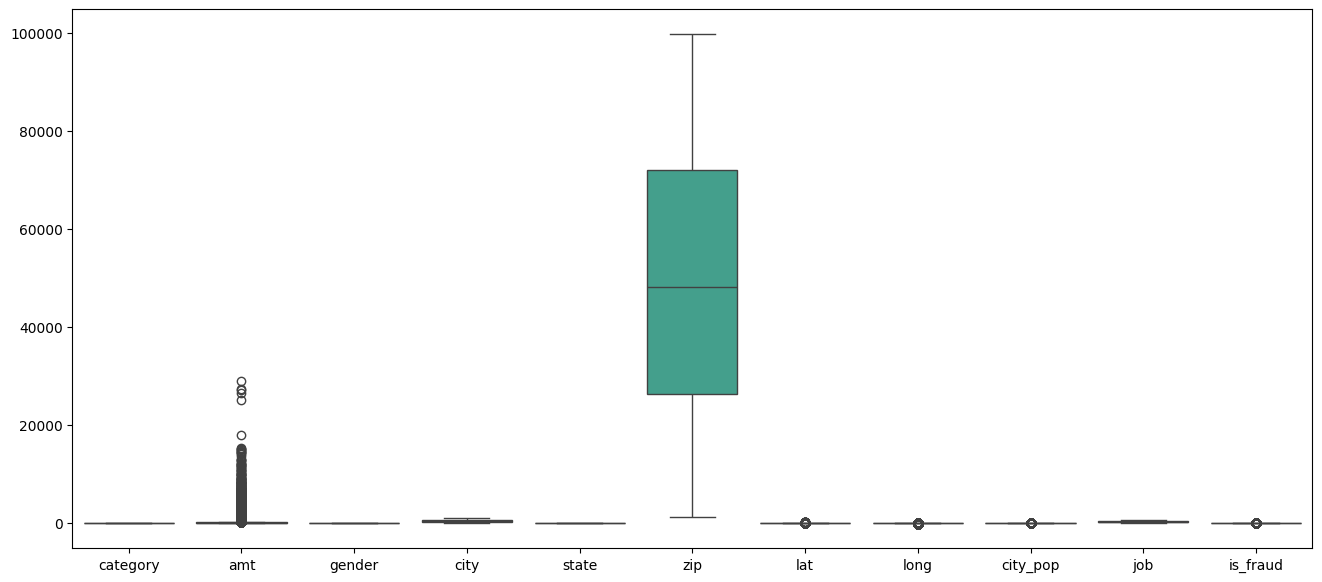

In [34]:
plt.figure(figsize=(16, 7))
sns.boxplot(data=data_4)
plt.show()

# Normal plot check
Small outliers are there in amt feature, so we can check spread the values in amt column using normal plot check


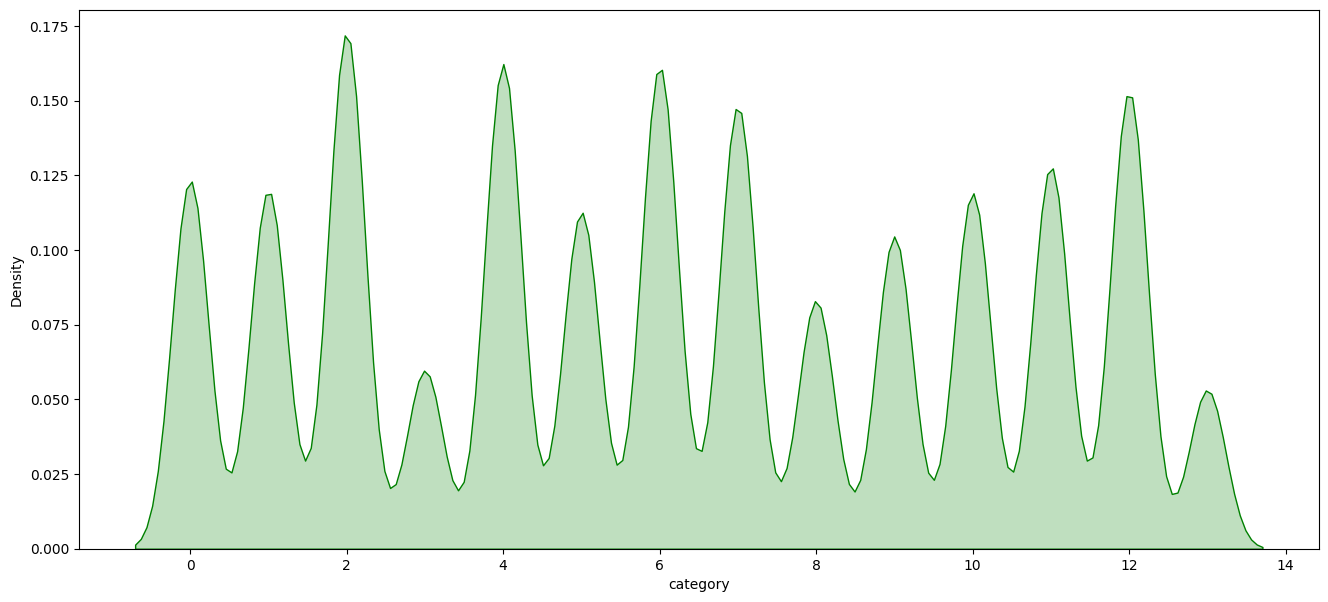

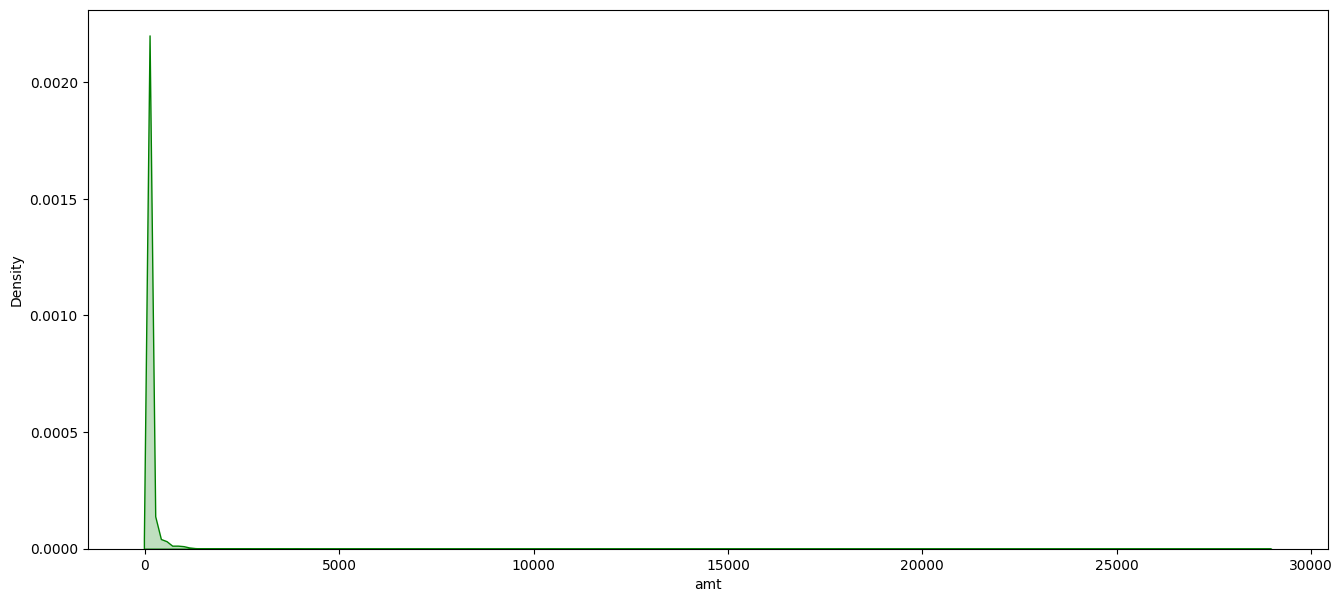

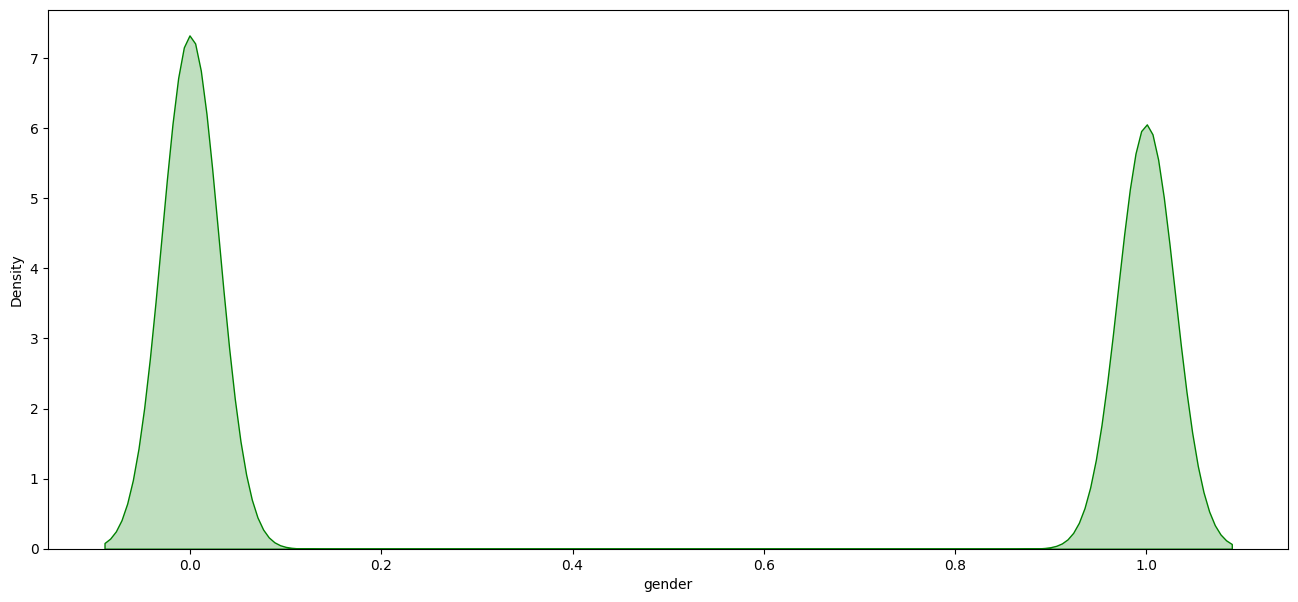

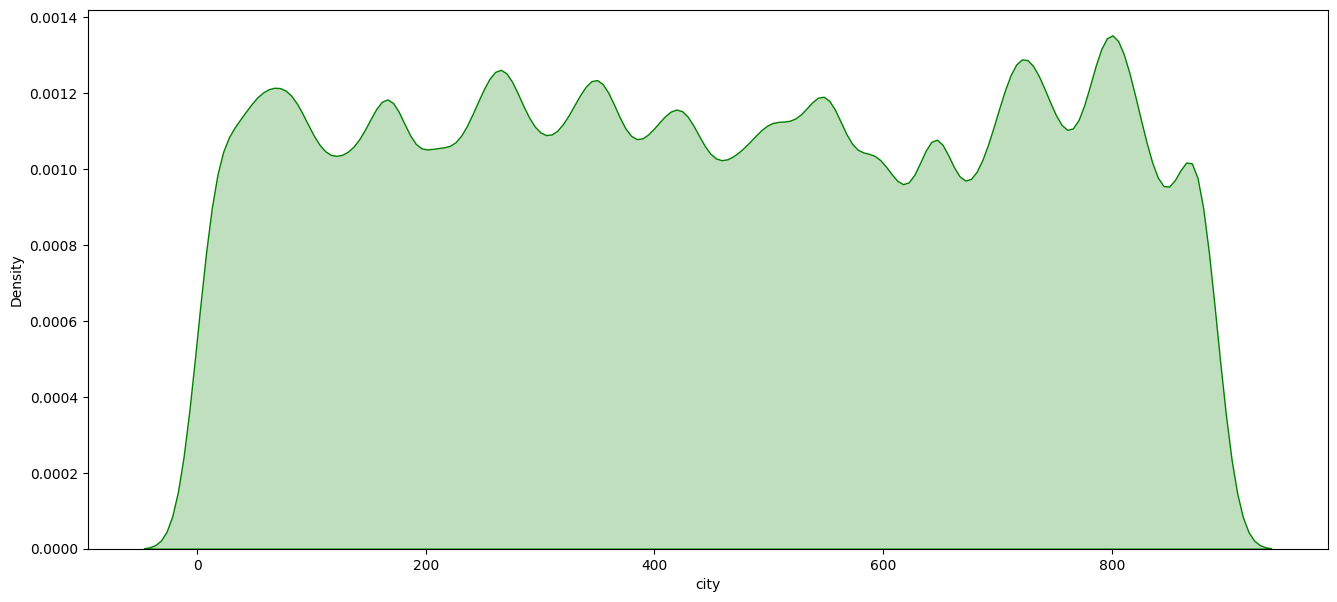

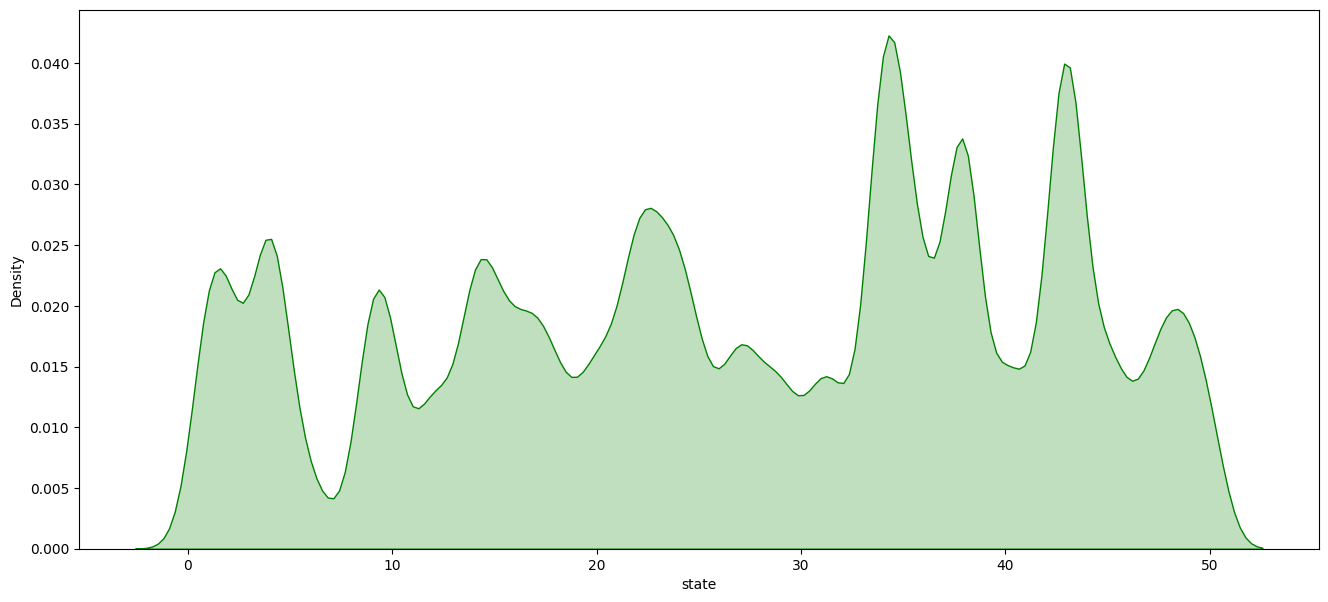

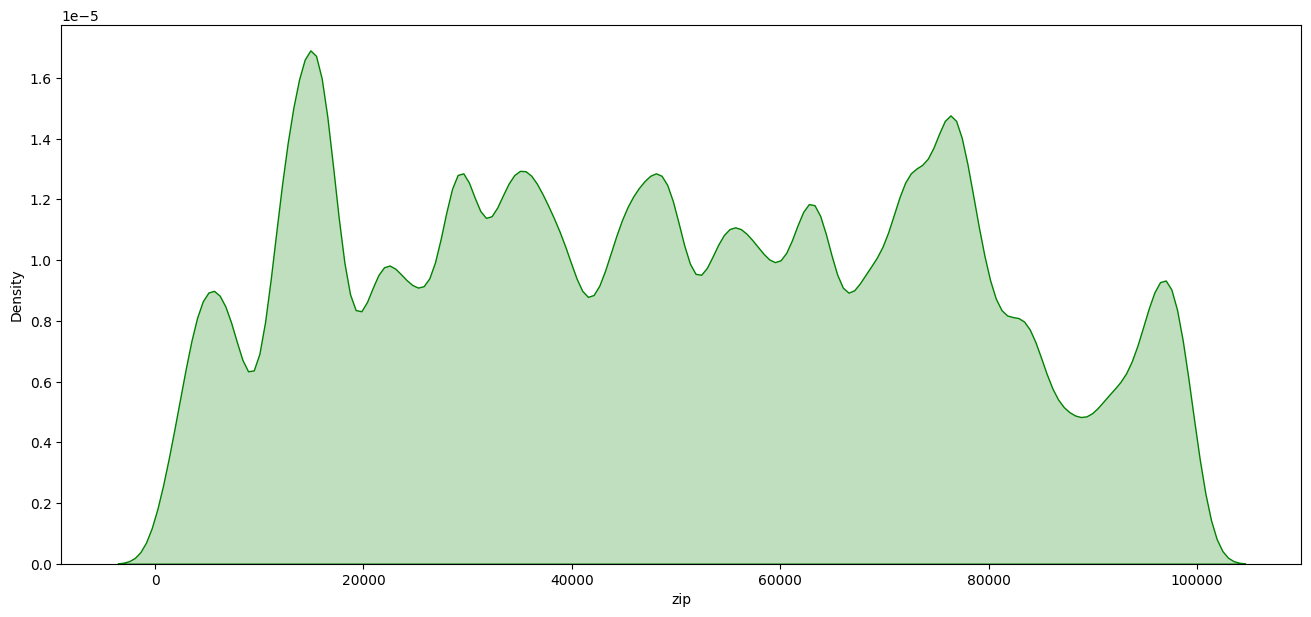

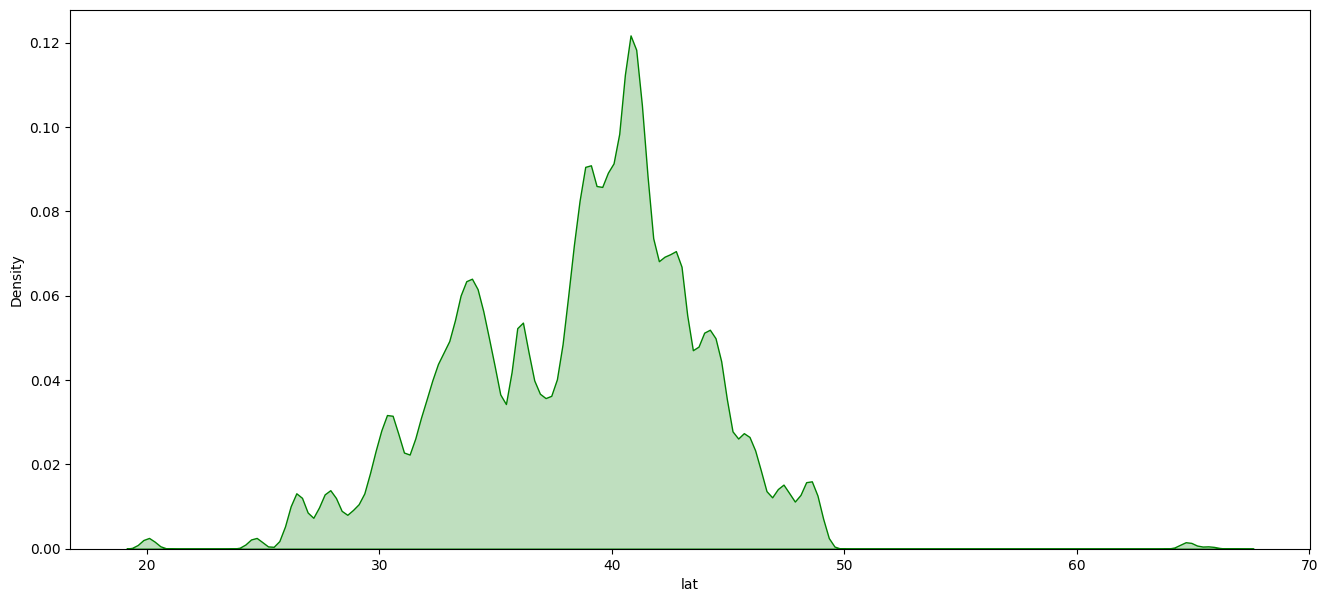

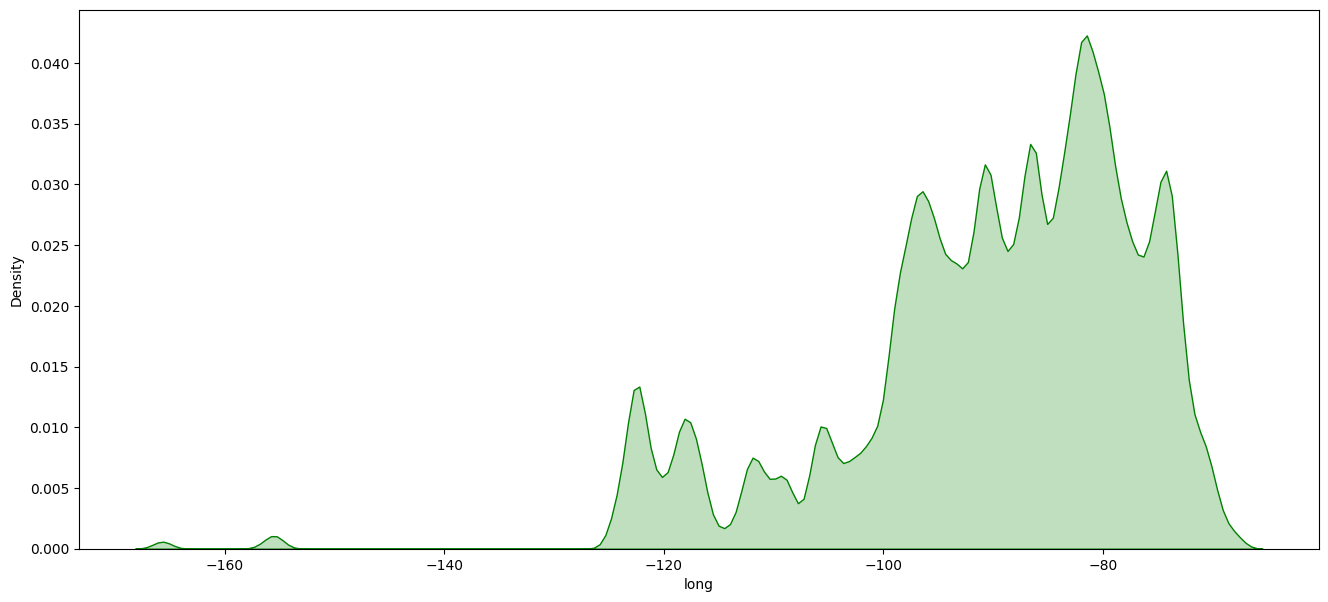

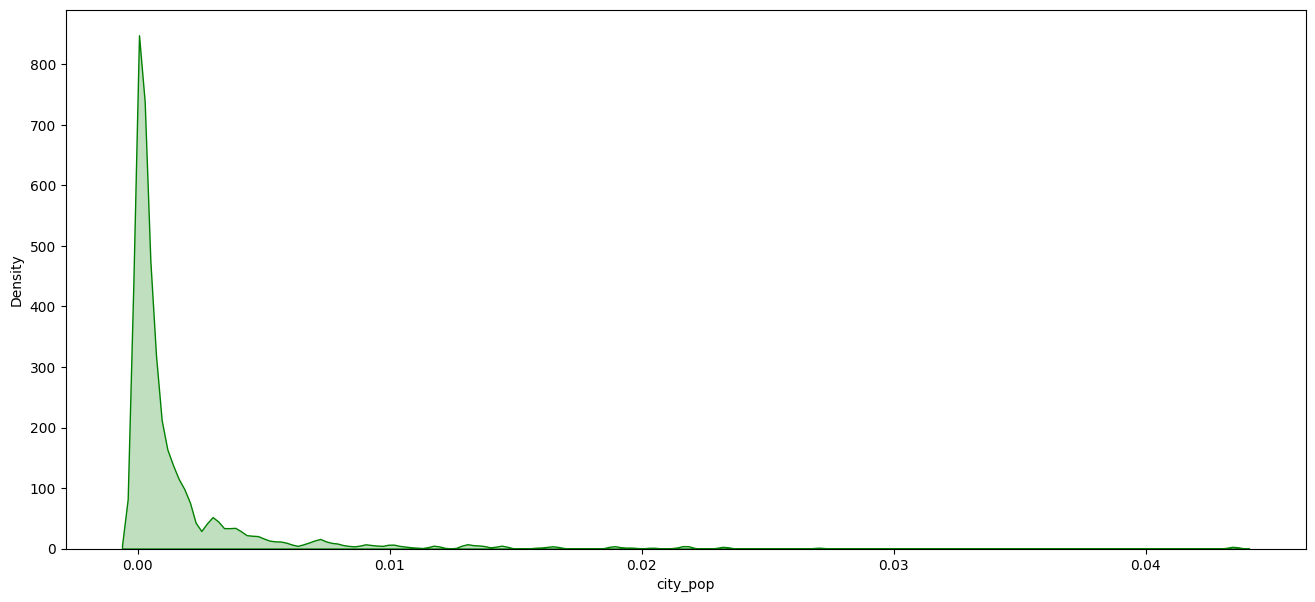

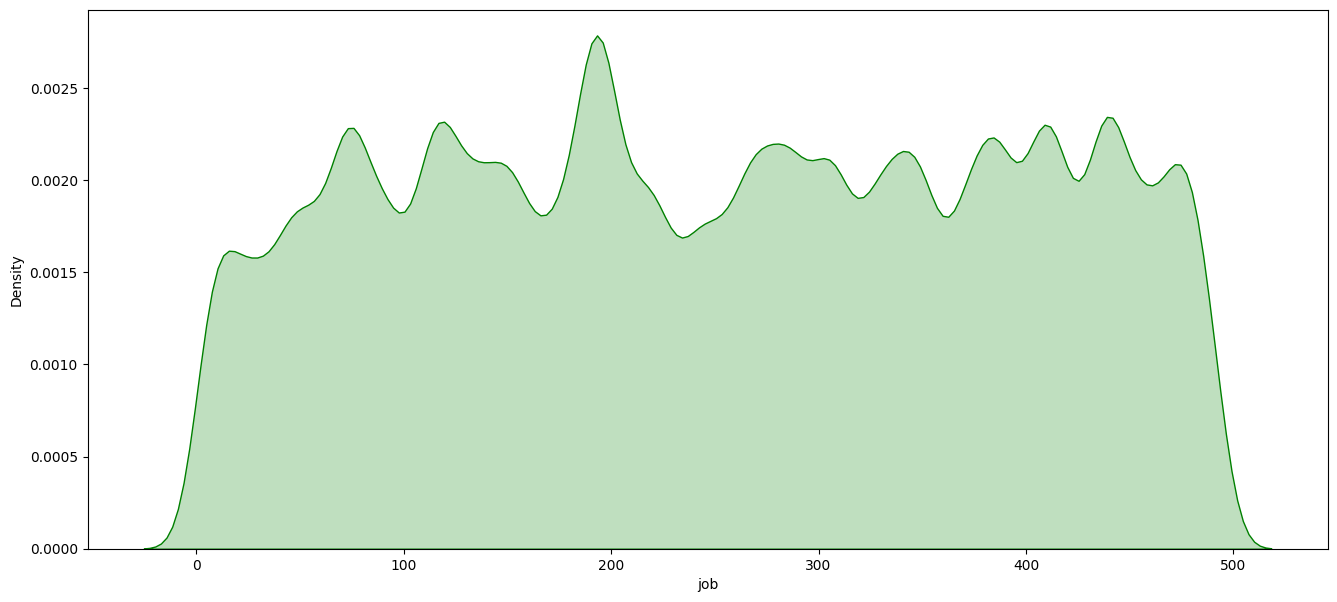

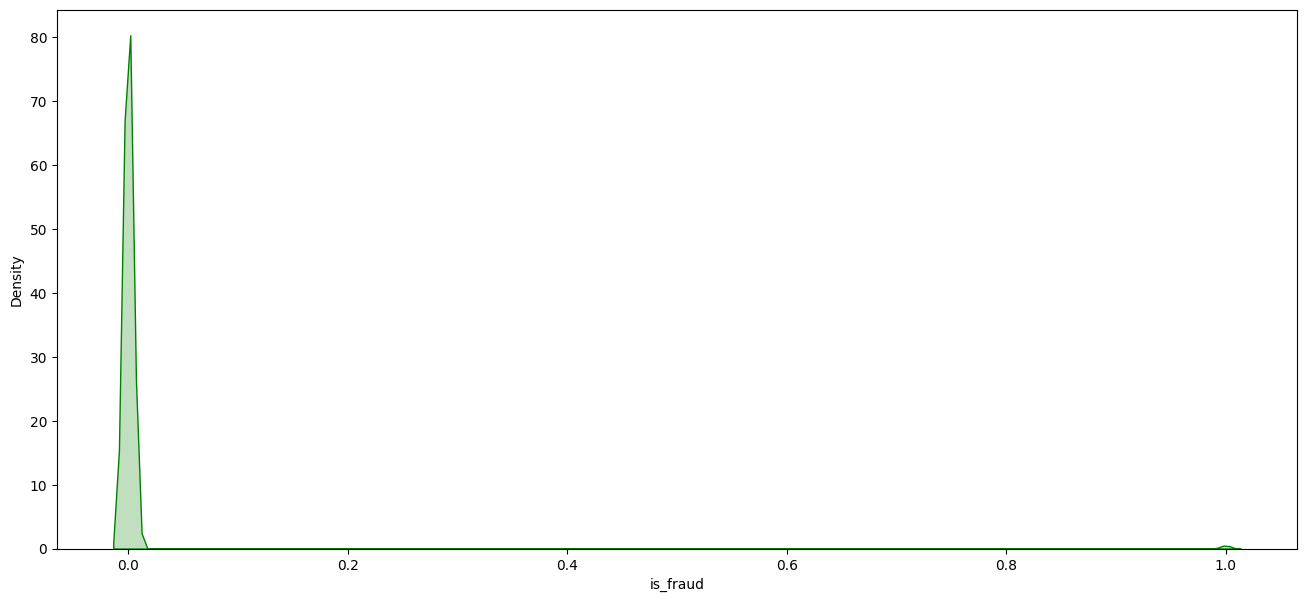

In [35]:
# If outliers are there for the any column value, the curve is skwed in left or right side for the specific column.
#Example: City_pop and amt lat having the outliers, so the curve is skewed in right side, but the value difference is very less.
for i in data_4.columns:
    plt.figure(figsize=(16, 7))
    sns.kdeplot(data = data_4[i], fill = True, color='g')
    plt.show()  
    

# Feature Importance

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
build_data = data_4.drop('is_fraud', axis=1)
lab_data = data_4['is_fraud']

In [38]:
fs_model = RandomForestClassifier(n_estimators=20, random_state=40)
fs_model.fit(build_data, lab_data)

RandomForestClassifier(n_estimators=20, random_state=40)

In [39]:
fs_model.feature_importances_

array([0.20999032, 0.54746836, 0.00798098, 0.03450591, 0.02052567,
       0.03295361, 0.03343097, 0.03197765, 0.04602933, 0.0351372 ])

In [40]:
pd.DataFrame({'column_name': build_data.columns, 'feature_score': fs_model.feature_importances_}).sort_values('feature_score', ascending=False)

,column_name,feature_score
1,amt,0.547468
0,category,0.209990
8,city_pop,0.046029
9,job,0.035137
3,city,0.034506
6,lat,0.033431
5,zip,0.032954
7,long,0.031978
4,state,0.020526
2,gender,0.007981


In [41]:
data_5 = data_4[['amt', 'category', 'city_pop', 'job', 'city', 'lat', 'zip', 'long', 'is_fraud']]
data_5

,amt,category,city_pop,job,city,lat,zip,long,is_fraud
0,4.97,8,0.000286,370,526,36.0788,28654,-81.1781,0
1,107.23,4,0.006711,428,612,48.8878,99160,-118.2105,0
2,220.11,0,0.000241,307,468,42.1808,83252,-112.2620,0
3,45.00,2,0.000516,328,84,46.2306,59632,-112.1138,0
4,41.96,9,0.010101,116,216,38.4207,24433,-79.4629,0
...,...,...,...,...,...,...,...,...,...
1296670,15.56,0,0.003876,215,330,37.7175,84735,-112.4777,0
1296671,51.70,1,0.010000,360,813,39.2667,21790,-77.5101,0
1296672,105.93,1,0.001112,308,346,32.9396,88325,-105.8189,0
1296673,74.90,1,0.000888,485,471,43.3526,57756,-102.5411,0


# Model Building

In [42]:
train_data = data_5.drop('is_fraud', axis=1)
train_lab = data_5['is_fraud']


In [43]:
model = RandomForestClassifier(n_estimators=60, random_state=40)
model.fit(train_data, train_lab)

RandomForestClassifier(n_estimators=60, random_state=40)

In [44]:
predicted_score = model.predict(train_data)

In [45]:
acc_score = accuracy_score(train_lab, predicted_score)
acc_score

0.999976863901903

In [46]:
prec_score = precision_score(train_lab, predicted_score)
prec_score

0.9998662744049212

In [47]:
rec_score = recall_score(train_lab, predicted_score)
rec_score

0.9961364241939782

In [48]:
f1_score = f1_score(train_lab, predicted_score)
f1_score

0.9979978643886812

# Save the model

In [49]:
import pickle

In [50]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [51]:
# Read and predict the value - used in deployment
with open("model.pkl", "rb") as f:
    pick_model = pickle.load(f)  

In [52]:
pick_model

RandomForestClassifier(n_estimators=60, random_state=40)

In [53]:
import numpy as np  

In [54]:
# 	amt	category	city_pop	job	city	lat	zip	long	is_fraud
# 0	4.97	8	0.000286	370	526	36.0788	28654	-81.1781	0

In [55]:
data_input = np.array([4.97,8,0.000286,370,526,36.0788,28654,-81.1781]).reshape(1, -1)
predicted_value = pick_model.predict(data_input)[0]
predicted_value

c:\Users\vsudh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



np.int64(0)

In [56]:
if predicted_value == 1:
    print("Fraud Transaction")
else:
    print("Normal Transaction")

Normal Transaction


In [57]:
data_5[data_5['is_fraud']==1]

,amt,category,city_pop,job,city,lat,zip,long,is_fraud
2449,281.06,4,1.129944e-03,425,165,35.9946,28611,-81.7266,1
2472,11.52,2,6.266461e-07,228,725,29.4400,78208,-98.4590,1
2523,276.31,4,6.266461e-07,228,725,29.4400,78208,-98.4590,1
2546,7.03,2,1.129944e-03,425,165,35.9946,28611,-81.7266,1
2553,275.73,4,6.266461e-07,228,725,29.4400,78208,-98.4590,1
...,...,...,...,...,...,...,...,...,...
1295399,977.01,11,9.466291e-06,271,829,27.6330,32960,-80.4031,1
1295491,1210.91,11,9.466291e-06,271,829,27.6330,32960,-80.4031,1
1295532,10.24,2,1.401836e-05,222,209,30.4590,70726,-90.9027,1
1295666,21.69,2,4.347826e-02,115,592,31.8599,79759,-102.7413,1


In [58]:
test_data = data_5[data_5['is_fraud']==1][['amt', 'category', 'city_pop', 'job', 'city', 'lat', 'zip', 'long']].head(30)
pick_model.predict(test_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [59]:
data_input_2 = np.array([281.06,	4,	1.129944e-03,	425,	165,	35.9946, 28611,	-81.7266]).reshape(1, -1)
predicted_value_2 = pick_model.predict(data_input_2)[0]
predicted_value_2

c:\Users\vsudh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



np.int64(1)

In [60]:
if predicted_value_2 == 1:
    print("Fraud Transaction")
else:
    print("Normal Transaction")

Fraud Transaction
